In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


In [103]:
data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [104]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Filling the missing data**

<AxesSubplot:>

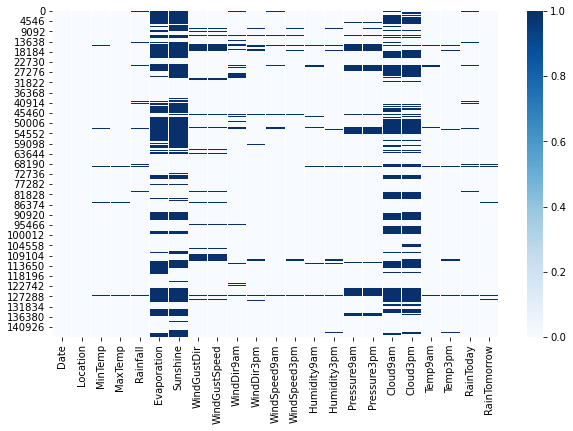

In [106]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap='Blues')

In [107]:
for col in data.columns:
    if data[col].dtype == object:
        imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    else:
        imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
    
    imputer.fit(data[[col]])
    data[[col]] = imputer.transform(data[[col]])

<AxesSubplot:>

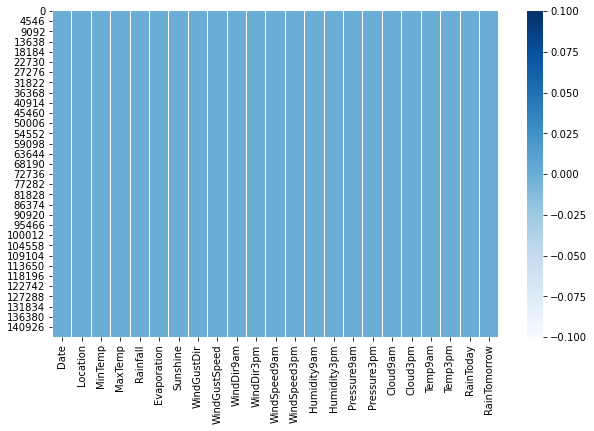

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap='Blues')

**Encoding Categorical Data**

In [109]:
categorical_col = ['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']

In [110]:
data.drop(['Date','Location'],inplace=True,axis=1)

In [111]:
for col in categorical_col:
    dummy = pd.get_dummies(data[col],drop_first=True)
    data = pd.concat([data,dummy],axis=1)
           
    #remove the original column
    data.drop(col,axis=1,inplace=True)
   

In [112]:
le = LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [113]:
data.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 63 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainTomorrow   145460 non-null  int64  
 17  ENE            145460 non-nul

In [115]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'ENE', 'ESE', 'N', 'NE', 'NNE',
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'ENE',
       'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW',
       'W', 'WNW', 'WSW', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
       'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'Yes'],
      dtype='object')

**Splitting Data into train and test sets**

In [116]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'ENE', 'ESE', 'N', 'NE', 'NNE',
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'ENE',
       'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW',
       'W', 'WNW', 'WSW', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
       'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'Yes']]

In [117]:
y = data['RainTomorrow']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [124]:
print("Training Data\n")
print(X_train.shape)
print(Y_train.shape)
print("\nTest Data\n")
print(X_test.shape)
print(Y_test.shape)

Training Data

(109095, 152)
(109095, 2)

Test Data

(36365, 152)
(36365, 2)


**Scaling the Data**

In [125]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Support Vector Classifier**

Training the model

In [126]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

**With Test Data**

In [128]:
y_pred = classifier.predict(X_test)

**Evaluating the Model**

In [144]:
print("Accuracy = {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print('\nClassification Report')
print(classification_report(y_test,y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Accuracy = 84.48%

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     28302
           1       0.76      0.44      0.56      8063

    accuracy                           0.84     36365
   macro avg       0.81      0.70      0.73     36365
weighted avg       0.84      0.84      0.83     36365

Confusion Matrix
[[27141  1161]
 [ 4483  3580]]
